->One of the main challenges with k-means is that the size of clusters is different
->Another challenge with kmeans is when the densities of the original points is different.One of the solutions is to use a higher number of clusters.

We use K-Means++ as it specifies a procedure to initialize the cluster centers before moving to the standard k-means clustering algorithm implementation


The steps to initialize the centroids using K-Means++ are:

->The first cluster is chosen uniformly instead of randomly picking up all the centroids  we choose one centroid here
->Next we just compute the distance (D(x)) of each data point (x) from the cluster center that has been already chosen.
->Then we need to choose a new cluster center from the datapoints with the probability of x being proportional to the (D(x))2
->We then repeat the steps 2 and 3 until k clusters are chosen.
This makes the cluster value to be chosen wisely where the decrease in inertia value becomes constant that being made to chose the right cluster value of the data..

In [ ]:
import pandas as pd
a = pd.read_csv("/content/Wholesale customers data.csv")
a.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#The aim of the problem is to segment the clients of wholesale distributor 
#based on their annual spending on diverse
# product categories like Milk,Grocery,region etc..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#read the data
data = pd.read_csv("Wholesale customers data.csv")
#data.head()

Now we need to segment the customers based on the above provided details.To understand we need to pull some statistics

In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


As we are having variations in data when compared with Channel,region and fresh,milk,grocery as they are having higher magnitude.So we need to use StandardScaler

In [ ]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
#data_scaled

In [ ]:
#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [ ]:
#As the magnitude looks similar,we create a kmeans 
#function and fit it on the data
kmeans = KMeans(n_clusters = 2,init='k-means++')
#fitting the kmeans algorithm on the scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#To evaluate how well our clusters are formed we calculate the inertia
kmeans.inertia_

2599.384423783625

In [ ]:
#Elbow curve method to determine the optimum number of clusters
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_clusters=cluster,n_jobs=-1,init='k-means++')
  kmeans.fit(data_scaled)
  SSE.append(kmeans.inertia_)
print(SSE)

[3520.0000000000005, 2599.3873849123083, 2147.6785841630845, 1851.8408722743852, 1549.5879962884387, 1313.9619874240173, 1173.7285957651097, 1050.5015668332617, 980.9959992473075, 913.7214561094871, 848.8255086422823, 807.0953003425125, 761.7385569815344, 723.8482785628614, 705.6005871966988, 659.6675936424001, 635.1757123879569, 601.1251576450146, 587.4666255794532]


In [ ]:
#converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
#frame

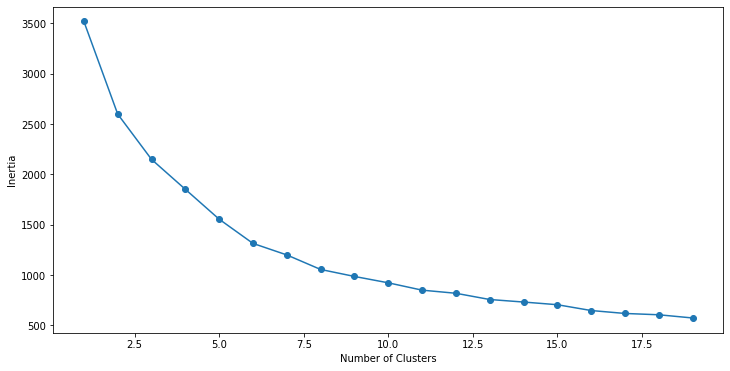

In [ ]:
#Elbow curve method to determine the optimum number of clusters
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_clusters=cluster,n_jobs=-1,init='k-means++')
  kmeans.fit(data_scaled)
  SSE.append(kmeans.inertia_)

#converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#kmeans using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs=-1,n_clusters=5,init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
#pred

In [ ]:
#lets look at the value count of points in each of 
#above formed clusters
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    200
0    126
1     90
4     14
3     10
Name: cluster, dtype: int64